<a href="https://colab.research.google.com/github/sameepv21/ML_Algorithms_From_Scratch/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
* Linear Regression can't work in case of classficiation.
* The reason is that linear regression will output any continuous real values whereas for classification, we require outputs that are discrete.
* This is why there is an element of probability involved.
* Logistic Regression models the probability of a data point being in each of the category and based on a threshold, assigns them to one of the classes.
* Also note that, logistic regression is a discriminative model implying that the algorithm learns about the separability or decision boundary of the classes instead of learning about distributions of each individual classes which is the case for generative models.

# Working
* Logistic Regression uses something called as logistic function.
* Why is there a need for it?
  * Linear regression can't model probability because for some values of X, linear regression will always output a value either less than 0 or greater than 1.
  * This does not make sense because the values of probability should always be between 0 and 1.
  * 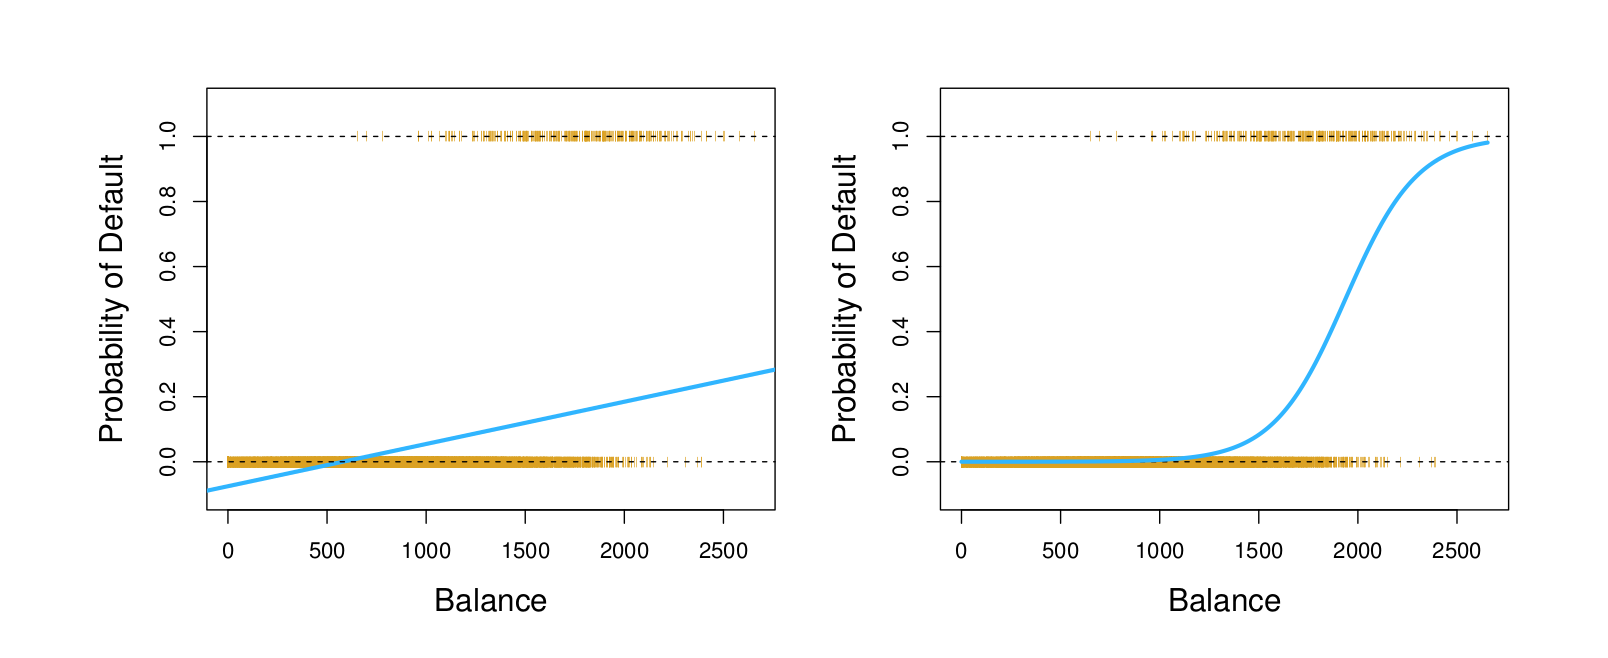
  * As can be seen in the above figure, there is a need for non-linear S-Shaped curve (Logistic function).
* Most commonly used logistic function is the sigmoid function whose formula is 1/1 + e^(-$\Theta$^T*x) where x is the input features and $\Theta$ is the matrix of weights or parameters.
* Speciality of this logistic function (sigmoid) is that the range of values is always between 0 and 1 which is ideal for modelling probabilities.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_tnc

In [ ]:
# Download the dataset
!wget https://raw.github.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

--2022-07-12 03:40:31--  https://raw.github.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt [following]
--2022-07-12 03:40:31--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘marks.txt.11’

marks.txt.11        100%[===============

In [ ]:
# Load the dataset

marks_df = pd.read_csv("/content/marks.txt", names=['Midsem', 'Endsem', 'Admission'])
marks_df.head()

,Midsem,Endsem,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### About the dataset
* The dataset contains two features which are the marks scored by a particular student in mid semester exam and end semester exam.
* Based on those, it is decided whether the student is admitted to a particular university of not.
  * 1 --> Admitted and 0 --> Not Admitted
* This is thus a binary classification problem.

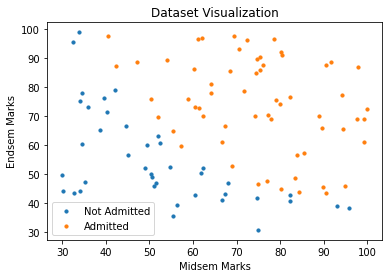

In [ ]:
# Plot the dataset for better visualization

plt.scatter(x=marks_df[marks_df['Admission'] == 0]["Midsem"], y=marks_df[marks_df['Admission'] == 0]['Endsem'], s=10, label='Not Admitted')
plt.scatter(x=marks_df[marks_df['Admission'] == 1]['Midsem'], y=marks_df[marks_df['Admission'] == 1]['Endsem'], s=10, label='Admitted')
plt.xlabel("Midsem Marks")
plt.ylabel("Endsem Marks")
plt.title("Dataset Visualization")
plt.legend(loc='best')
plt.show()

# Hypothesis Function
* 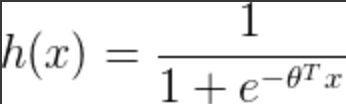
* This hypothesis function is used for making the decision boundary and finding optimal sets of parameters.
* Based on this, we set a threshold on this hypothesis function (which says about probability) which is used to final parameters.
* Graph of Hypothesis Function
  * 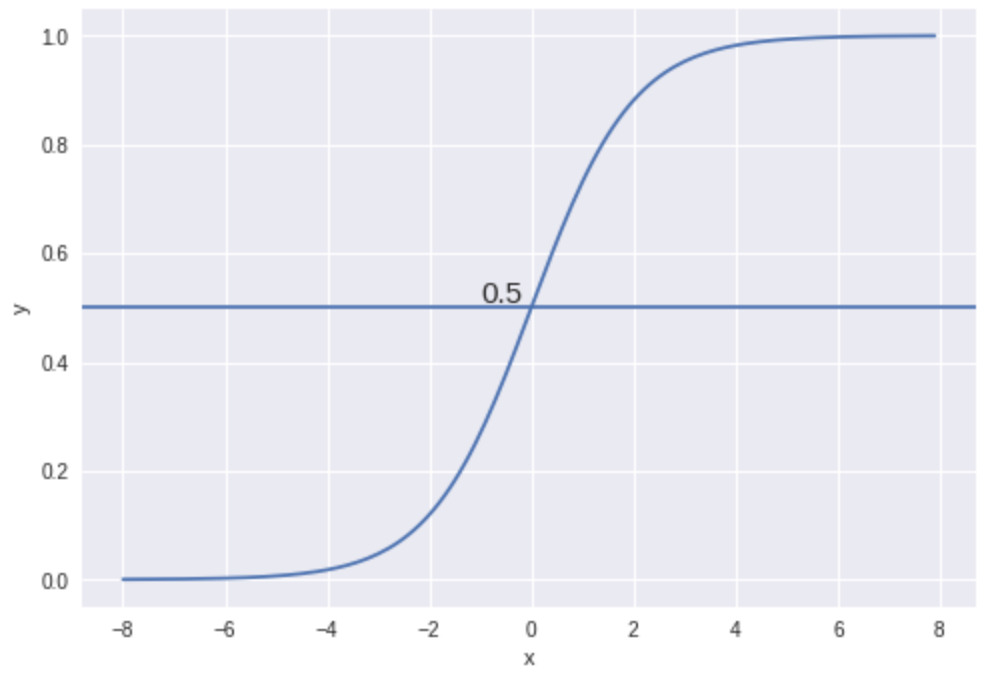

# Cost function
* The traditional MSE can't be used because instead of it being a convex function with a global minima, it becomes a step function with 0 and 1 as the values.
* Thus, there is a need for a convex cost function.
* We use the following as the cost function
  * -ylog(h($\Theta$) - (1-y)(log(1 - h($\Theta$)))
* Suppose the average of this cost function is denoted as J($\Theta$)

# Graph of cost function
* 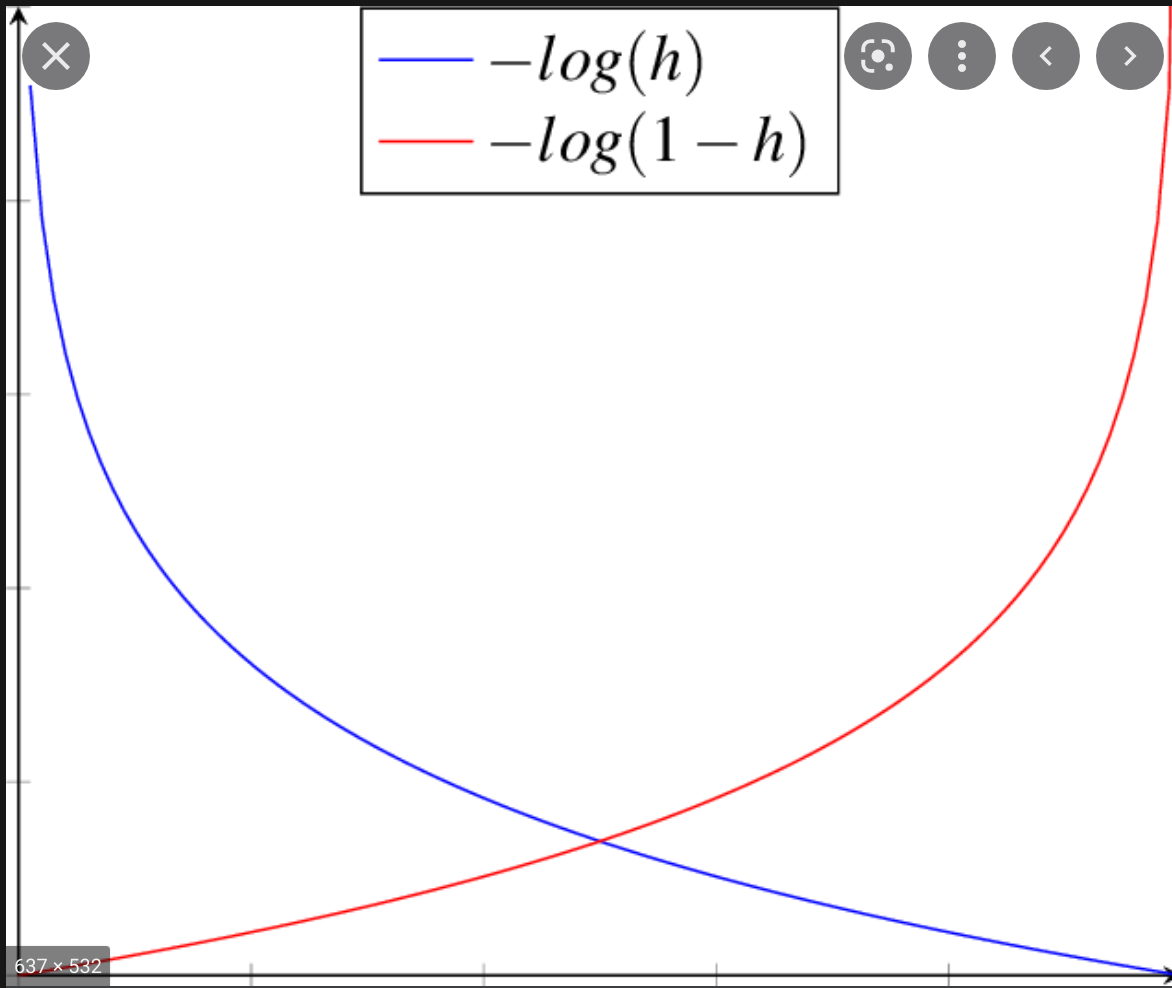
* As can be seen above, the graph of the cost function thus becomes a convex function having one global minima and now gradient descent be used.

# Gradient Descent
* ![](https://miro.medium.com/max/552/1*3-s2EtTHU0qJs7pA_iGT_w.png)
  * [Check out the derivation of derivative :)](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)
* Next update the weights and find the optimal set of weights and bias.
* Then make predictions.

In [ ]:
from sklearn.model_selection import train_test_split

SEED_VALUE = 42
TEST_SIZE = 0.2 # 20% of the data to be in the test

# Add a column for bias in marks_df
marks_df['Bias'] = 1

# 80% training data and 20% testing/validation data
y_train = marks_df['Admission']
X_train = marks_df.drop("Admission", axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = TEST_SIZE, random_state = SEED_VALUE)

In [ ]:
# Random initialization of theta vector
theta = np.zeros((X_train.shape[1], 1)) # Taking care of dimensions here itself
theta.shape

(3, 1)

In [ ]:
class LogisticRegressionFromScratch():
  def sigmoid(self, x): # Returns the probability
    return 1/(1 + np.exp(-x))
  
  def cost_function(self, theta, x, y):
    # Average of ylog(sigmoid) + (1 - y)log(1 - sigmoid)
    average_loss = -1/x.shape[0] * np.sum(
        y*np.log(self.sigmoid(np.dot(x, theta)) + (1 - y) * np.log(1 - self.sigmoid(np.dot(x, theta))))
    )
    return average_loss
  
  def gradient(self, theta, x, y):
    temp = 1/x.shape[0] * np.dot(x.T, self.sigmoid(np.dot(x, theta)) - y)
    return temp
  
  def fit(self, theta, x, y):
    optimal_weights = fmin_tnc(func = self.cost_function, x0 = theta, fprime=self.gradient, args = (x, y))
    self.final_weights = optimal_weights[0]
    return self

In [ ]:
model = LogisticRegressionFromScratch()
model.fit(theta, X_train, y_train)
print("Model Parameters are: ", model.final_weights)
parameters = model.final_weights

Model Parameters are:  [ 0.07915705  0.01752158 -5.25271415]


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


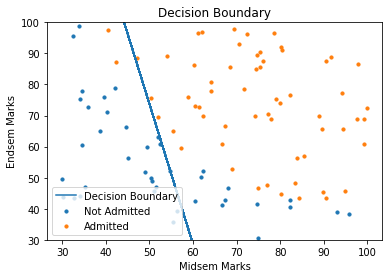

In [ ]:
plt.scatter(x=marks_df[marks_df['Admission'] == 0]["Midsem"], y=marks_df[marks_df['Admission'] == 0]['Endsem'], s=10, label='Not Admitted')
plt.scatter(x=marks_df[marks_df['Admission'] == 1]['Midsem'], y=marks_df[marks_df['Admission'] == 1]['Endsem'], s=10, label='Admitted')
plt.xlabel("Midsem Marks")
plt.ylabel("Endsem Marks")
plt.title("Decision Boundary")
plt.legend(loc='lower left')

x2 = - (parameters[2] + np.dot(parameters[0], X_train['Midsem'])) / parameters[1]

plt.plot(X_train['Midsem'], x2, label='Decision Boundary')
plt.ylim(30, 100)
plt.legend(loc='lower left')
plt.show()

# Important Points
* Standardization will not affect the output (unless regularization is involved) as it is not based on distance.
* Its primary assumptions are
  * Relationship between the logit and each continuous independent variable is linear.
  * There are no highly influencial outliers.
  * There is an absence of multicollinearity.